In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import Image

## SVM Linear Model

In [2]:
Image(url="images/SVM_Margin.png", width=400, height=400)

## Hyperplane Equation
### $ h(x) = \vec{w} \cdot \vec{x} - b = 0$

If the number of features is two, the equation can be written as:
### $ ((w_1 \times x_1) + (w_2 \times x_2)) - b = 0 $

## Maximum Margin Classifier

### $ h(x_i) \le -1 $ if $ y_i = -1 $
### $ h(x_i) \ge 1 $ if $ y_i = 1 $
__so__ 
### $ y_i(w \cdot x_i - b) \ge 1 $
__and__ $ y_i \in \lbrace {-1, 1} \rbrace $

## Loss Function: Hinge Loss

In [3]:
Image(url="images/Hinge_loss_vs_zero_one_loss.svg", width=450, height=450)

### $ l = max(0,1 - y_i(w \cdot x_i - b)) $

### $ l = 0 $ if $ y \cdot f(x) \ge 1 $
### $ l = 1 - y \cdot f(x) $ otherwise

## Regularization

### $ J = {\lambda {\mid\mid w \mid\mid}^2} + {1 \over n} \sum \limits _{i = 1}^{n} {max(0,1 - y_i(w \cdot x_i - b)} $

### if $ y_i \cdot f(x) \ge 1: J_i = {\lambda {\mid\mid w \mid\mid}^2} $
### else $ J_i = {\lambda {\mid\mid w \mid\mid}^2} + 1 - y_i(w \cdot x_i - b) $

## Gradients

### if $ y_i \cdot f(x) \ge 1: $
### $ {\partial J_i \over \partial w} = 2 \lambda w   \Rightarrow  {\partial J_i \over \partial b} = 0 $
### else: 
### $ {\partial J_i \over \partial w} = 2 \lambda w - y_i \cdot x_i   \Rightarrow   {\partial J_i \over \partial b} = y_i $

## Update Gradients

### if $ y_i \cdot f(x) \ge 1: $ 
### $ w = w - \alpha \cdot dw = w - \alpha \cdot 2 \lambda w $ 
### $ b = b - \alpha \cdot d b = b $
__else__
### $ w = w - \alpha \cdot dw = w - \alpha \cdot(2 \lambda w - y_i \cdot x_i) $
### $ b = b - \alpha \cdot db = b - \alpha \cdot y_i $

## Algorithm

In [4]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_=0.01, epochs=1000):
        self.alpha = learning_rate
        self.lambda_ = lambda_
        self.epochs = epochs
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n, dim = X.shape
        self.w, self.b = self._init_weights(dim)
        
        y_ = np.where(y <= 0, -1, 1)
      
        for iteration in range(self.epochs):
            for i, X_i in enumerate(X):
                if y_[i] * (np.dot(X_i, self.w) - self.b) >= 1 : 
                    self.w -= self.alpha * (2 * self.lambda_ * self.w) 
                else:
                    self.w -= self.alpha * (2 * self.lambda_ * self.w - np.dot(X_i, y_[i])) 
                    self.b -= self.alpha * y_[i] 
            
            predicted = self._predict(X)
            loss = self._get_loss(y, predicted)
            if (iteration%100) == 0:
                print (f"iteration: {iteration}, loss: {loss:.3f}")
                    
        return self.w, self.b
        
    def _init_weights(self, dim):
        weights = np.random.rand(dim)
        bias = np.random.rand()
        return weights, bias
    
    def predict(self, X):
        pred = np.dot(X, self.w) - self.b 
        result = [1 if val > 0 else 0 for val in pred]
        return result
        
    def _predict(self, X):
        return X.dot(self.w) - self.b
        
    def _get_loss(self, actual, predicted):
        new_predicted = np.array([-1 if i==0 else i for i in predicted])
        new_actual = np.array([-1 if i==0 else i for i in actual])

        # calculating hinge loss
        hinge_loss = np.mean([max(0, 1-x*y) for x, y in zip(new_actual, new_predicted)])
        return hinge_loss


## Data

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200, centers=2, cluster_std=2, random_state=42)

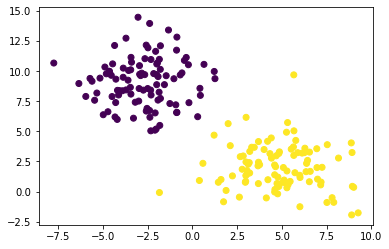

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

In [8]:
svm = SVM()

In [9]:
w, b = svm.fit(X_train, y_train)

iteration: 0, loss: 0.161
iteration: 100, loss: 0.034
iteration: 200, loss: 0.028
iteration: 300, loss: 0.022
iteration: 400, loss: 0.017
iteration: 500, loss: 0.014
iteration: 600, loss: 0.012
iteration: 700, loss: 0.010
iteration: 800, loss: 0.009
iteration: 900, loss: 0.008


In [10]:
preds = svm.predict(X_test)

In [11]:
preds[:10]

[0, 0, 0, 0, 0, 1, 0, 1, 0, 1]

In [12]:
y_test[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1])

In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(preds, y_test)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 100.0%


### Plot Hyperplane

In [14]:
def get_linear_vector(x, w, b, margin):
        return (-w[0]*x + b + margin)/w[1]

In [15]:
def plot_svm(X, y, w, b):    

    plt.scatter(X[:, 0], X[:, 1], c=y)

    x_min = min(X[:, 0])
    x_max = max(X[:, 0])

    x_1 = get_linear_vector(x_min, w, b, 0)
    x_2 = get_linear_vector(x_max, w, b, 0)

    x_1_up = get_linear_vector(x_min, w, b, -1)
    x_2_up = get_linear_vector(x_max, w, b, -1)

    x_1_down = get_linear_vector(x_min, w, b, 1)
    x_2_down = get_linear_vector(x_max, w, b, 1)

    plt.plot([x_min, x_max], [x_1, x_2], 'r')
    plt.plot([x_min, x_max], [x_1_up, x_2_up], 'k--')
    plt.plot([x_min, x_max], [x_1_down, x_2_down], 'k--')
    
    plt.show()

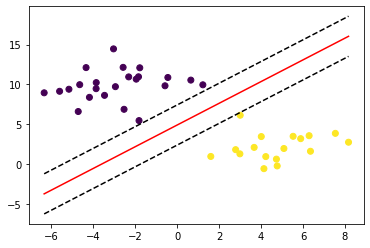

In [16]:
plot_svm(X_test, y_test, w, b)